In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('../data/titanic.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/titanic.csv'

In [3]:
df = pd.read_csv('titanic.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [4]:
df =pd.read_csv('Titanic-Dataset.csv')

In [5]:
# basic info about the dataset
print(df.info())
# summary statistics for numeric coloumns 
print(df.describe())
#check for missing values 
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [6]:
# Fill missing age with median 
df['Age'].fillna(df['Age'].median(),inplace=True)
# fill missing ebarked with mode 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#drop cabin column 
df.drop(columns=['cabin'],inplace=True)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_24104\3634404022.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_24104\3634404022.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



KeyError: "['cabin'] not found in axis"

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
# Convert 'Sex' column: male → 0, female → 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' column (C, Q, S)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,True


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale Age and Fare columns
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [11]:
df[['Age', 'Fare']].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00


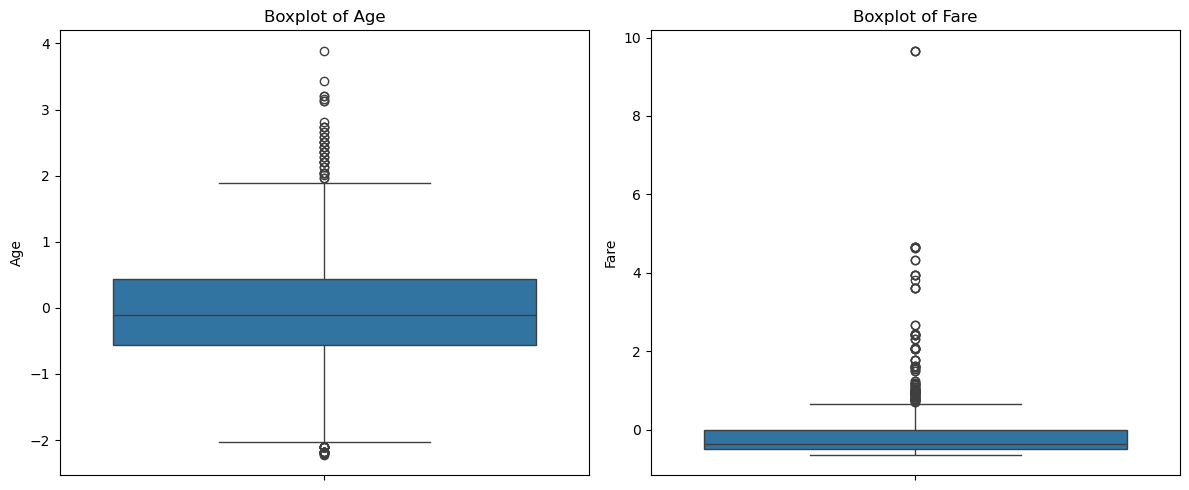

In [12]:
# Visualize outliers in Age and Fare
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

In [13]:
# IQR method to remove outliers from Age and Fare
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within 1.5 * IQR range
df = df[~((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  721 non-null    int64  
 1   Survived     721 non-null    int64  
 2   Pclass       721 non-null    int64  
 3   Name         721 non-null    object 
 4   Sex          721 non-null    int64  
 5   Age          721 non-null    float64
 6   SibSp        721 non-null    int64  
 7   Parch        721 non-null    int64  
 8   Ticket       721 non-null    object 
 9   Fare         721 non-null    float64
 10  Cabin        98 non-null     object 
 11  Embarked_Q   721 non-null    bool   
 12  Embarked_S   721 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(3)
memory usage: 69.0+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,NaN,False,True
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,NaN,False,True
5,6,0,3,"Moran, Mr. James",0,-0.104637,0,0,330877,-0.478116,NaN,True,False
